<a href="https://colab.research.google.com/github/AlexGCas/web_scraping/blob/main/tutorial_web_scraping_scielo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib
from bs4 import BeautifulSoup
import nltk
import PIL
import matplotlib.pyplot as plt
import re

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


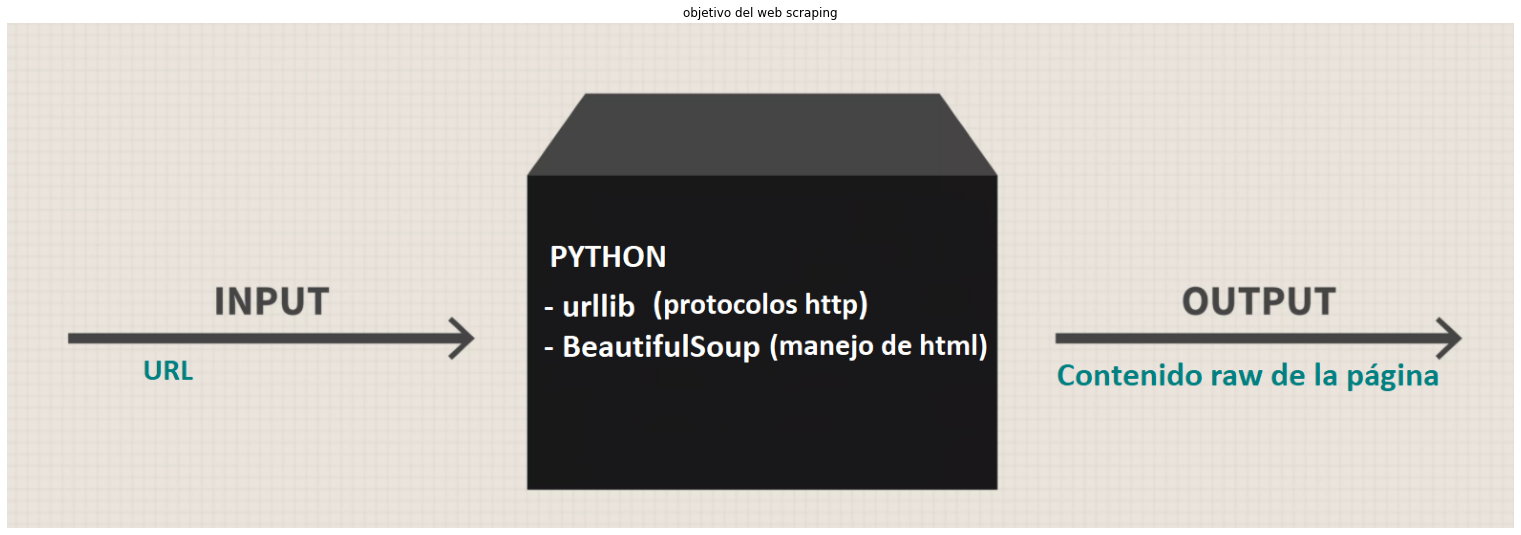

In [ ]:
url_imagen_objetivo = "/content/gdrive/MyDrive/imagenes/webscraping/objetivo.PNG"
imagen_objetivo = PIL.Image.open(url_imagen_objetivo)
titulo = "objetivo del web scraping"
plt.figure(figsize = (27, 13))
plt.imshow(imagen_objetivo)
plt.axis("off")
plt.title(titulo)
imagen_objetivo.close()

In [ ]:
url_imagenes = ["/content/gdrive/MyDrive/imagenes/webscraping/client-server-2x.png", 
"/content/gdrive/MyDrive/imagenes/webscraping/HTTP_Request_Headers2.png",
"/content/gdrive/MyDrive/imagenes/webscraping/An-HTTP-response-message.png"]
titulos = ["cliente-servidor", "http request", "http response"]
imagenes = [PIL.Image.open(url_imagen) for  url_imagen in url_imagenes]

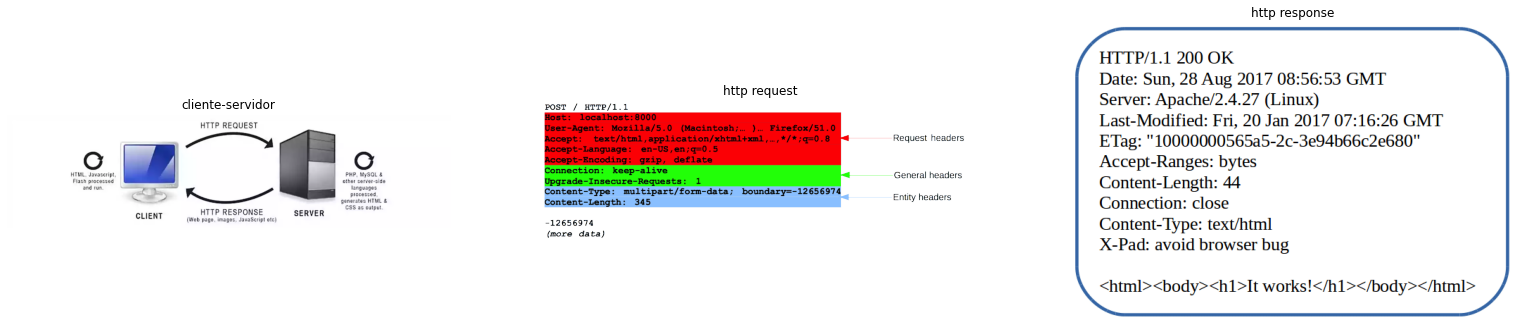

In [ ]:
plt.figure(figsize = (27, 10))
for i in range(len(imagenes)):
  plt.subplot(1, 3, i + 1)
  plt.imshow(imagenes[i])
  plt.axis("off")
  plt.title(titulos[i])
  imagenes[i].close()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Primero se realiza la extracción de un solo artículo a la vez para entender la estructura de la página, aquí se van a extraer artículos de:

1.   scielo (revista electrónica de artículos científicos electrónica)
2.   neurologia.com (revista electrónica de artículos cientificos de neurología)
3.   towardsdatascience.com (página con artículos de machine learning e inteligencia artificial)




# scielo

In [ ]:
url = "https://scielo.conicyt.cl/scielo.php?script=sci_arttext&pid=S0717-92272020000100074&lang=es"
url = "http://www.scielo.org.pe/scielo.php?script=sci_arttext&pid=S1727-558X2019000400008&lang=es"
request = urllib.request.Request(url)
sitio = urllib.request.urlopen(request)
html_raw = sitio.read()
html = BeautifulSoup(html_raw)
sitio.close()

In [ ]:
articulo0 = html.find_all("div", {"class", "index,es"})[0].text

Hasta aquí ya hemos realizado la extracción de un artículo de scielo en formato raw (sin procesar).
en realidad, no estamos interesados en secciones como "abstrac" o "summary" (el resumen en inglés del artículo)

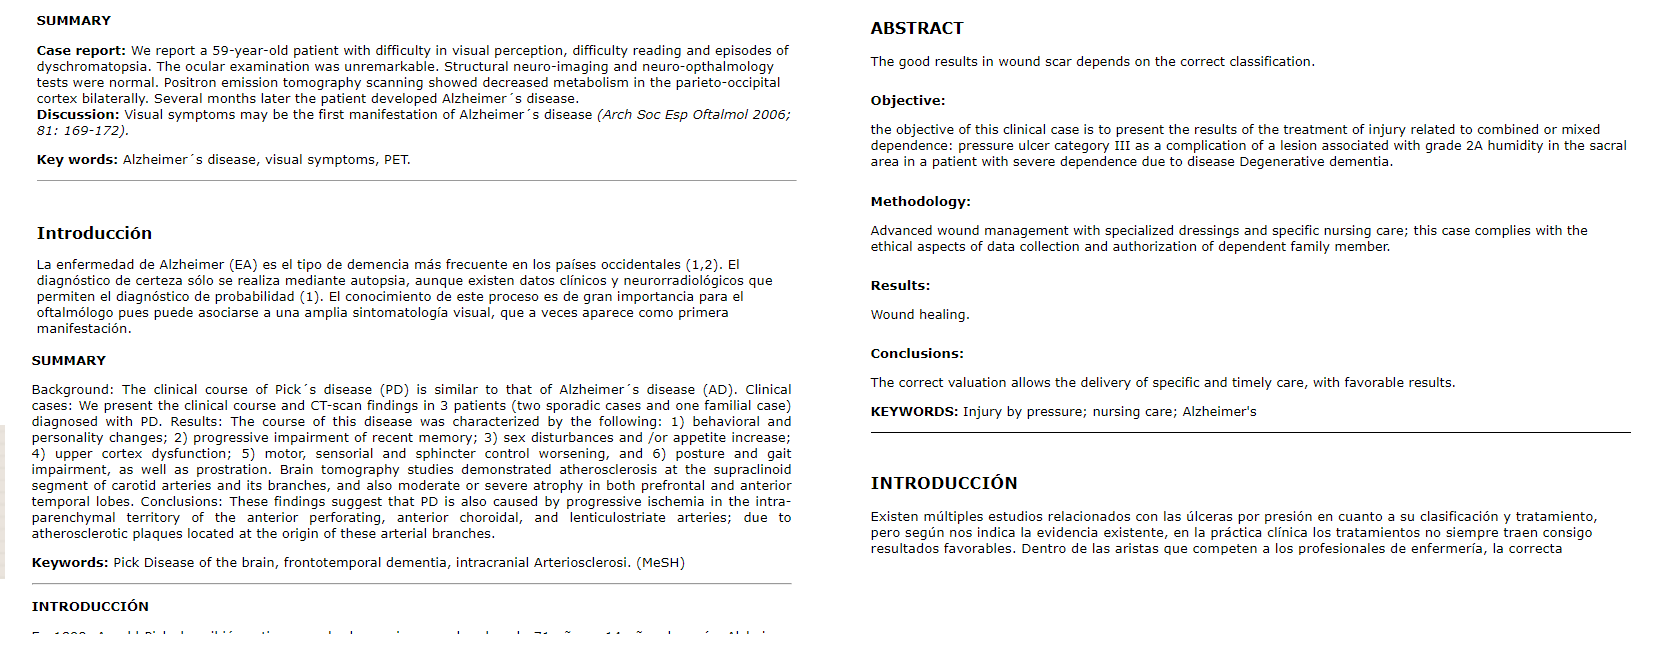

elementos como "referencias" podrían ser de utilidad en un futuro, sin embargo, deberían estar separadas del contenido del texto ya que no aportan valor semantico al artículo.

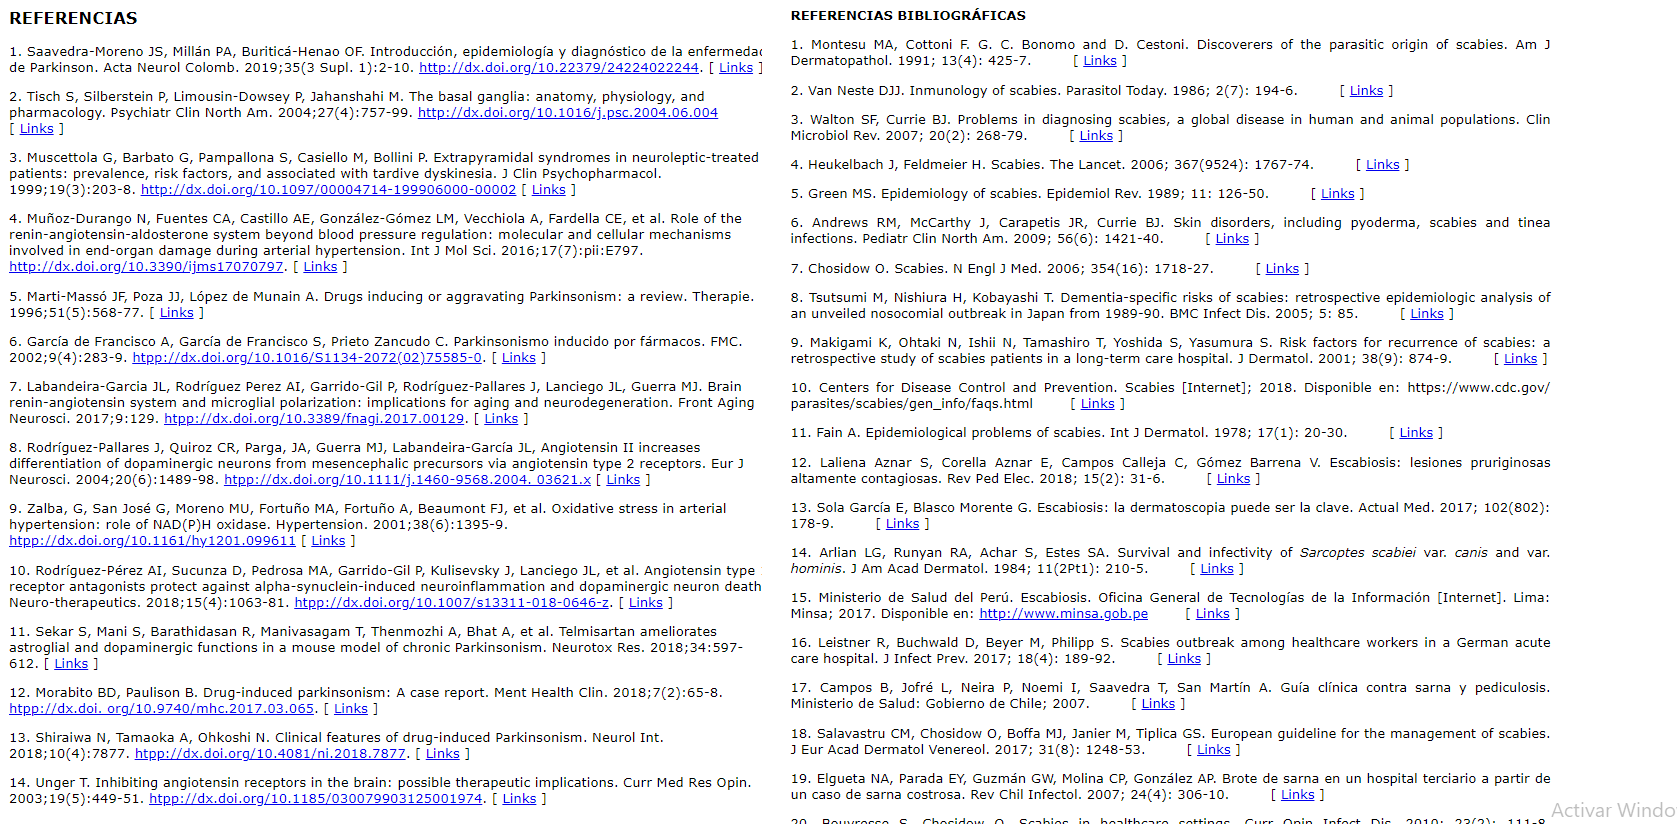

Y la sección de títulos y autores es relevante como metadatos (datos que describen los datos), sin embargo, es más útil extraerlas directamente del resultado de búsquedas

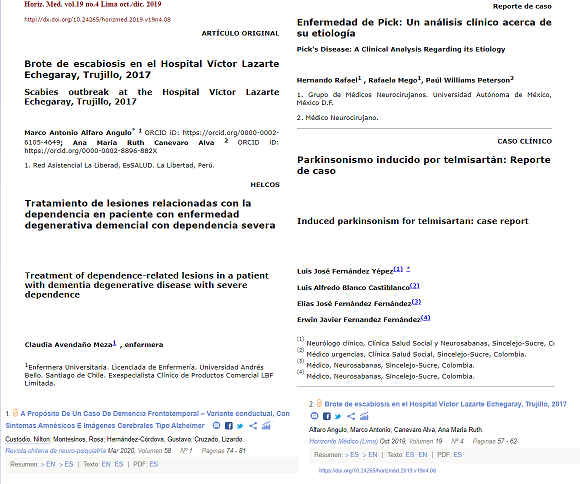

Por consistencia en el procesamiento de texto, se suele convertir el texto bien sea a letras minúsculas o a mayusculas. Las funciones de python para conversión de texto a mayúsculas se realiza con "string".upper(), la conversión a minúsculas se realiza con "STRING".lower(). En este caso se utiliza lower(). Luego de modificar el corpus todo el texto estará escrito en minúsculas

In [ ]:
articulo0 = articulo0.lower()
articulo0

'\n artículo original \xa0 brote de escabiosis en el hospital víctor lazarte echegaray, trujillo, 2017 scabies outbreak at the hospital víctor lazarte echegaray, trujillo, 2017  \xa0 marco antonio alfaro angulo* 1 orcid id: https://orcid.org/0000-0002-6105-4649; ana maria ruth canevaro alva 2 orcid id: https://orcid.org/0000-0002-8896-882x  1. red asistencial la liberad, essalud. la libertad, perú. 2. hospital i luis albrecht, essalud. la libertad, perú. * autor corresponsal  resumen  objetivo: describir las características de un brote de escabiosis y evaluar el impacto de las medidas de control.  \t     materiales y métodos: estudio epidemiológico descriptivo y prospectivo, realizado en un hospital de referencia, con 220 camas de hospitalización. los datos se recolectaron a través de visitas diarias al servicio de medicina, entrevistas al personal asistencial y revisión de las historias clínicas. en la descripción del brote se consideran las variables epidemiológicas de persona, lugar

# Una libería muy utilizada para el procesamiento de texto es la libería re, las funciones qué vamos a utilizar son findall y match:


## re.findall(patron, texto):

> findall funciona como ctrl+f, recibe un patrón de extresiones regulares y un texto, busca la expresión en el texto y retorna una lista con todas las coincidencias.

In [ ]:
REFERENCIAS_ESCABIOSIS_RAW = re.findall("(referencias[\w\W]+)", articulo0)[0]
REFERENCIAS_ESCABIOSIS_RAW

'referencias bibliográficas 1. montesu ma, cottoni f. g. c. bonomo and d. cestoni. discoverers of the parasitic origin of scabies. am j dermatopathol. 1991; 13(4): 425-7.    \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0[\xa0links\xa0] 2. van neste djj. inmunology of scabies. parasitol today. 1986; 2(7): 194-6.    \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0[\xa0links\xa0] 3. walton sf, currie bj. problems in diagnosing scabies, a global disease in human and animal populations. clin microbiol rev. 2007; 20(2): 268-79.    \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0[\xa0links\xa0] 4. heukelbach j, feldmeier h. scabies. the lancet. 2006; 367(9524): 1767-74.    \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0[\xa0links\xa0] 5. green ms. epidemiology of scabies. epidemiol rev. 1989; 11: 126-50.    \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0[\xa0links\xa0] 6. andrews rm, mccarthy j, carapetis jr, currie bj. skin disorders, including pyoderma, scabies and tinea infections. pediatr clin north am. 2009; 56(6): 1421-40.    \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0[\x

(refefencias[\w\W]+) busca la palabra referencias en el texto seguida del patrón [\w\W]+:
1. en expresiones regulares, los elementos "[]" representan un solo caracter, por ejemplo [a-z] representaría una sola letra en un rango de la a hasta la z
2. \w busca caracteres alfanuméricos  y \W busca caracteres NO alfanuméricos, ambos patrones dentro del bloque "[]" indican que buscamos cualquier elemento que esté en el string inmediatamente después de la palabra "referencias". 
3. El "+" indica que necesitamos seleccionar tantos bloques [\w\W] como sea posible.

del resultado almacenado en la variable REFERENCIAS_ESCABIOSIS, una referencia común está almacenada como:

*   1. montesu ma, cottoni f. g. c. bonomo and d. cestoni. discoverers of the parasitic origin of scabies. am j dermatopathol. 1991; 13(4): 425-7.    \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0[\xa0links\xa0].



el patrón de la expresión regular debe contener:
* un número seguido de un punto: [0-9]+. captura cualquier cantidad de números seguida de un punto
* cualquier cantidad de caracteres: [\w\W]+
* el patrón anterior debe terminar antes de la primera aparición de "\x", esto se logra encerrando el patrón anterior en un grupo seguido de un \x, los grupos se definen con (), el patrón hasta el momento es ([0-9]+.[\w\W])\x
* luego de la primera aparición de "\x" puede haber cualquier candidad de caracteres pero debe terminar con un "]", el patrón final es ([0-9]+.[\w\W])\x[\w\W]+? el "?" indica que el patrón debe ser lo más corto posible.

In [ ]:
REFERENCIAS_ESCABIOSIS = re.findall("([0-9]+\..+?)[\xa0]+", REFERENCIAS_ESCABIOSIS_RAW)
#\\[x][\w\W]+?] \\\\  \.[.]+)

## re.match(patron, texto):

In [ ]:
url2 = "http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0120-87482020000400247&lang=es"
request2 = urllib.request.Request(url2)
site2 = urllib.request.urlopen(request2)
html_raw2 = site2.read()
html2 = BeautifulSoup(html_raw2)
site2.close()

In [ ]:
articulo1 = html2.find_all("div", {"class" : "index,es"})[0].text.lower()

In [ ]:
REFERENCIAS_INDUCIDO_RAW = re.findall("(referencias[\w\W]+)", articulo1)[0]

Como las referencias entre artículo y artículo tienen un formato muy variable, no es posible formatear las referencias.

# Extracción del contenido del artículo

El contenido de los artículos en scielo va desde la introducción hasta las referencias, las referencias se pueden llamar "referencias" o "bibliografía"

In [ ]:
a = re.search("introducci", articulo1)

In [ ]:
a

<re.Match object; span=(561, 571), match='introducci'>

In [ ]:
articulo1[561:573]

'introducción'

In [ ]:
a.end()

571

In [ ]:
b = re.search("[[referencias][bibliograf]]", articulo1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Possible nested set at position 1
  """Entry point for launching an IPython kernel.


In [ ]:
b